<a href="https://colab.research.google.com/github/dev9454/Election-Results-2024-Data-Analysis/blob/main/Election%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html


In [8]:

election_results_path = '/content/election results.xlsx'
state_winning_path = '/content/State and winning.xlsx'
ge_india_2024_path = '/content/GE India 2024.xlsx'


election_results_df = pd.read_excel(election_results_path)
state_winning_df = pd.read_excel(state_winning_path)
ge_india_2024_df = pd.read_excel(ge_india_2024_path, sheet_name=None)


print("Sheets in 'GE India 2024.xlsx':", ge_india_2024_df.keys())


Sheets in 'GE India 2024.xlsx': dict_keys(['Counted vs polled', 'Final Result', 'Victory Margins'])


In [9]:
# Extract data from sheets
sheet1_df = ge_india_2024_df['Counted vs polled']
sheet2_df = ge_india_2024_df['Final Result']
sheet3_df = ge_india_2024_df['Victory Margins']


In [10]:
# Define columns
leading_party_col = 'Leading Party'
trailing_party_col = 'Trailing Party'
margin_col = 'Margin'
status_col = 'Status'
winning_party_col = 'Winning Party'
total_seats_col = 'Total Seats'


leading_party_counts = election_results_df[leading_party_col].value_counts()
trailing_party_counts = election_results_df[trailing_party_col].value_counts()
total_seats_won = state_winning_df.groupby(winning_party_col)[total_seats_col].sum()
margin_status_distribution = election_results_df[status_col].value_counts()

top_5_highest_margin = election_results_df.nlargest(5, margin_col)
top_5_lowest_margin = election_results_df.nsmallest(5, margin_col)


states_highest_seats = state_winning_df.loc[state_winning_df.groupby('State')[total_seats_col].idxmax()]


party_performance_by_state = state_winning_df.pivot(index='State', columns=winning_party_col, values=total_seats_col).fillna(0)


top_3_parties_performance = total_seats_won.nlargest(3)


total_constituencies = len(election_results_df)
leading_party_percentage = (leading_party_counts / total_constituencies) * 100


In [11]:

insights = {
    "Leading Party Counts": leading_party_counts,
    "Trailing Party Counts": trailing_party_counts,
    "Total Seats Won by Each Party": total_seats_won,
    "Margin Status Distribution": margin_status_distribution,
    "Top 5 Highest Margin Constituencies": top_5_highest_margin,
    "Top 5 Lowest Margin Constituencies": top_5_lowest_margin,
    "States with Highest Number of Seats Won by a Single Party": states_highest_seats,
    "Party Performance by State": party_performance_by_state,
    "Top 3 Parties Performance": top_3_parties_performance,
    "Leading Party Percentage": leading_party_percentage,
}


for key, value in insights.items():
    print(f"\n{key}:\n{value}")



Leading Party Counts:
Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Ind

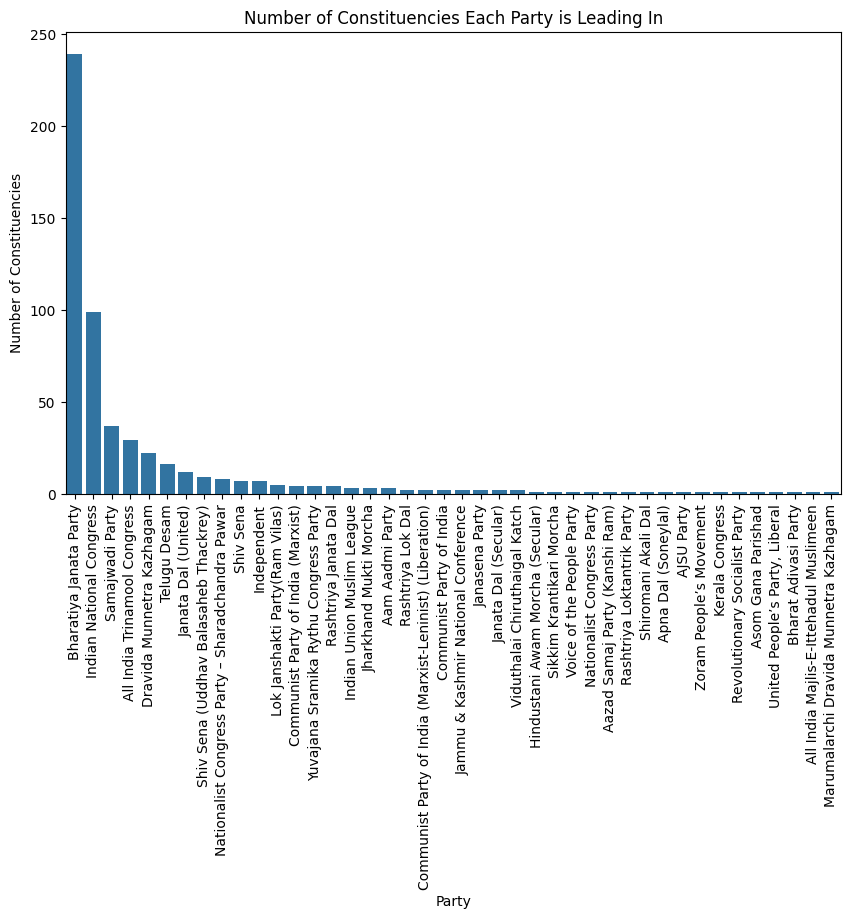

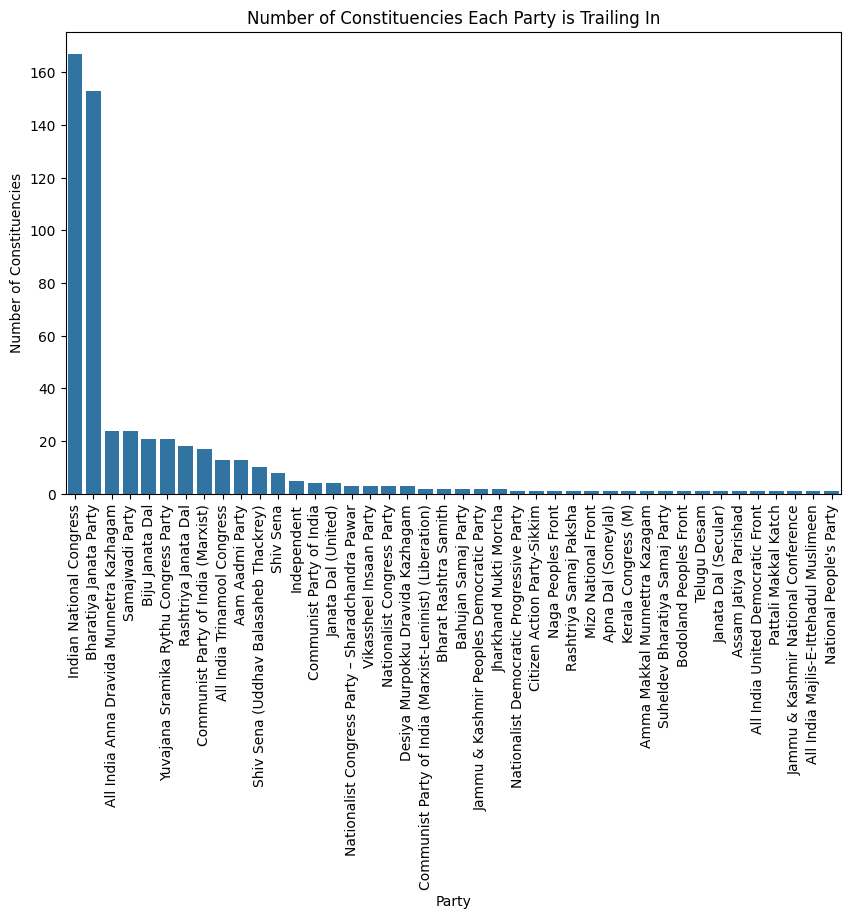

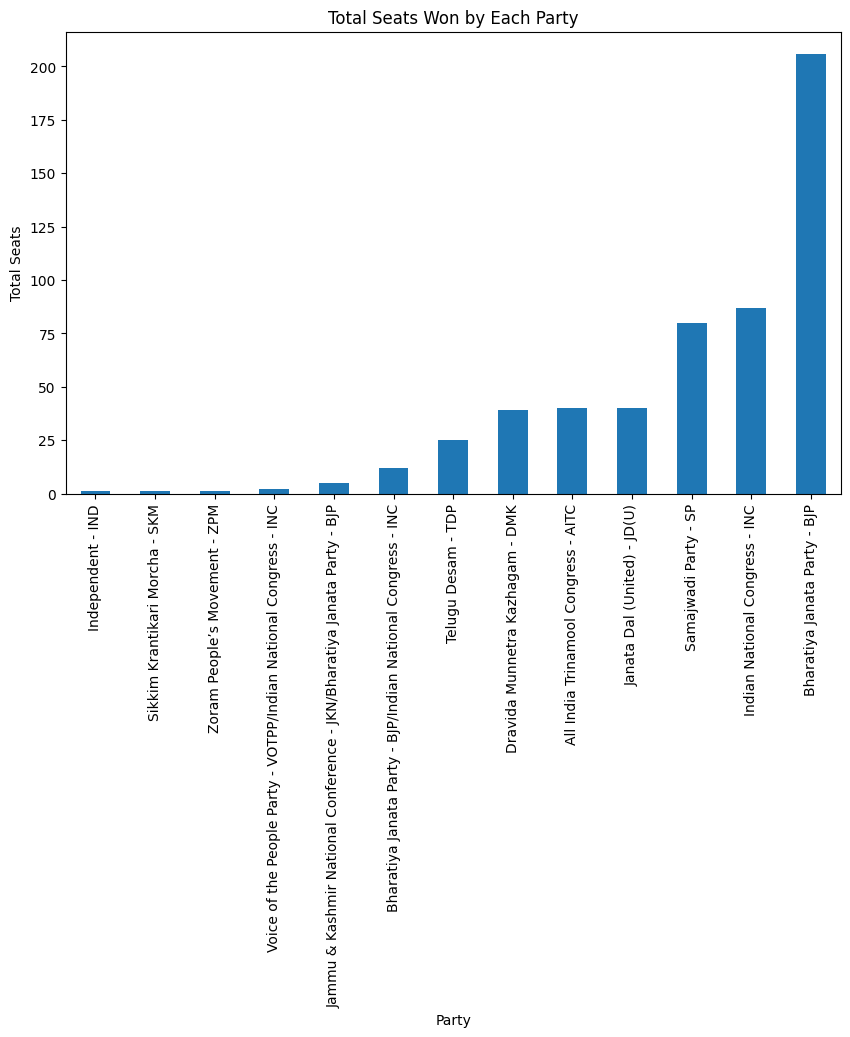

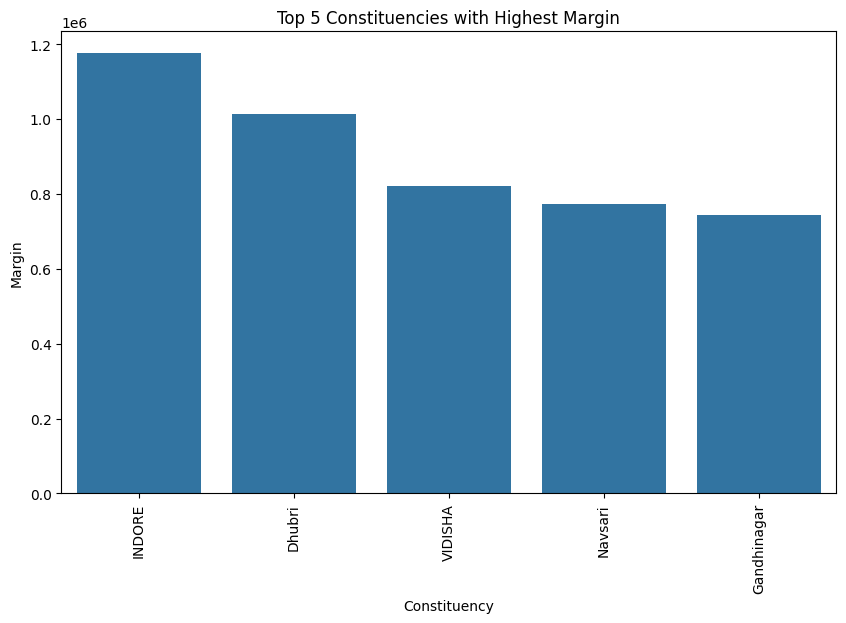

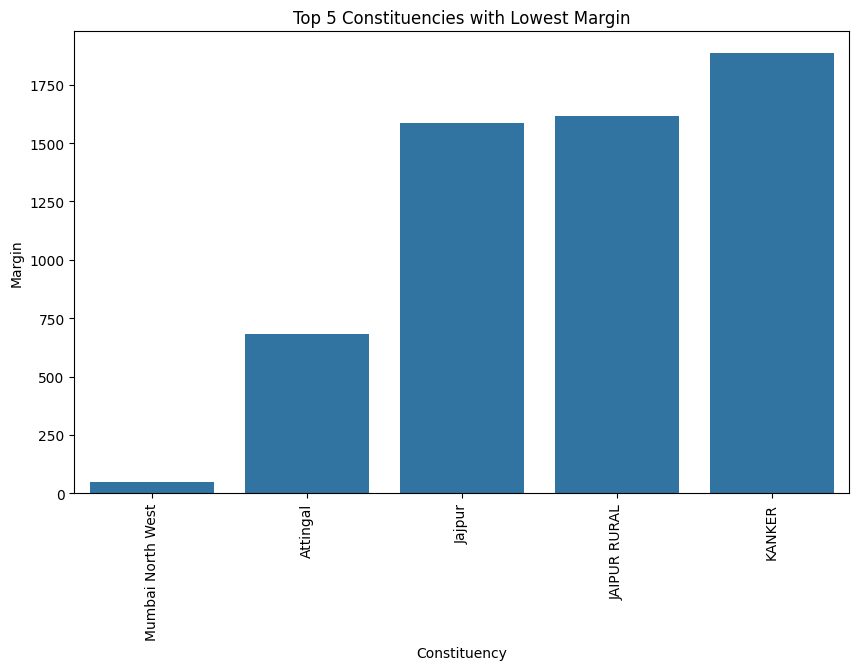

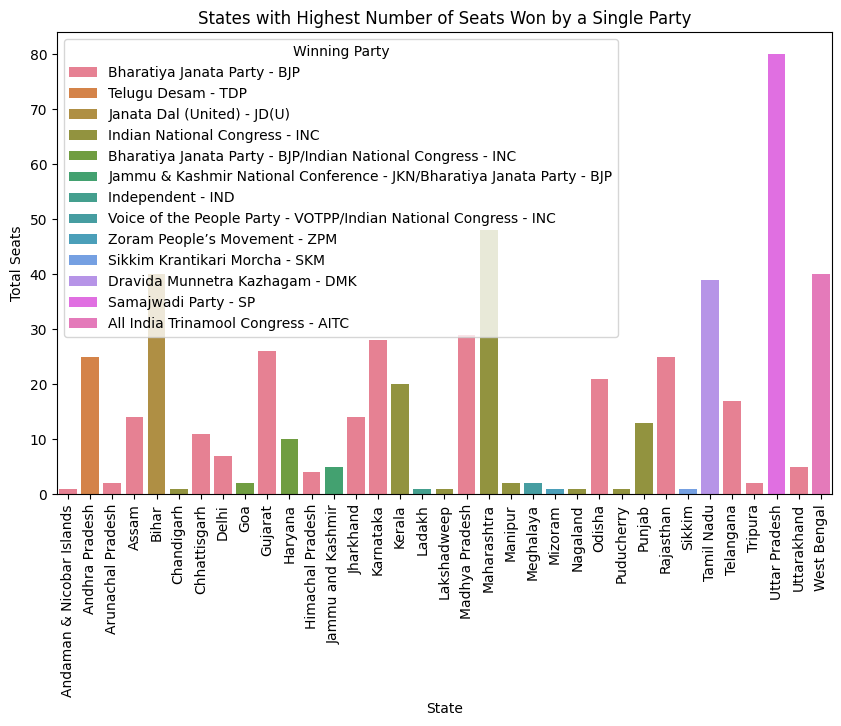

<Figure size 1500x1000 with 0 Axes>

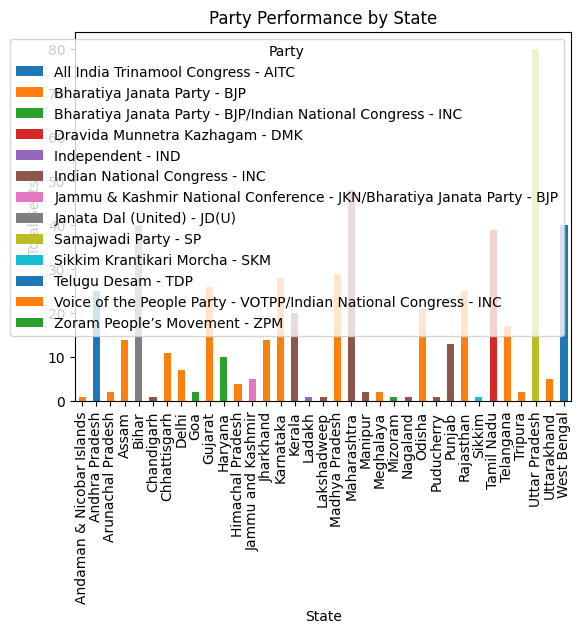

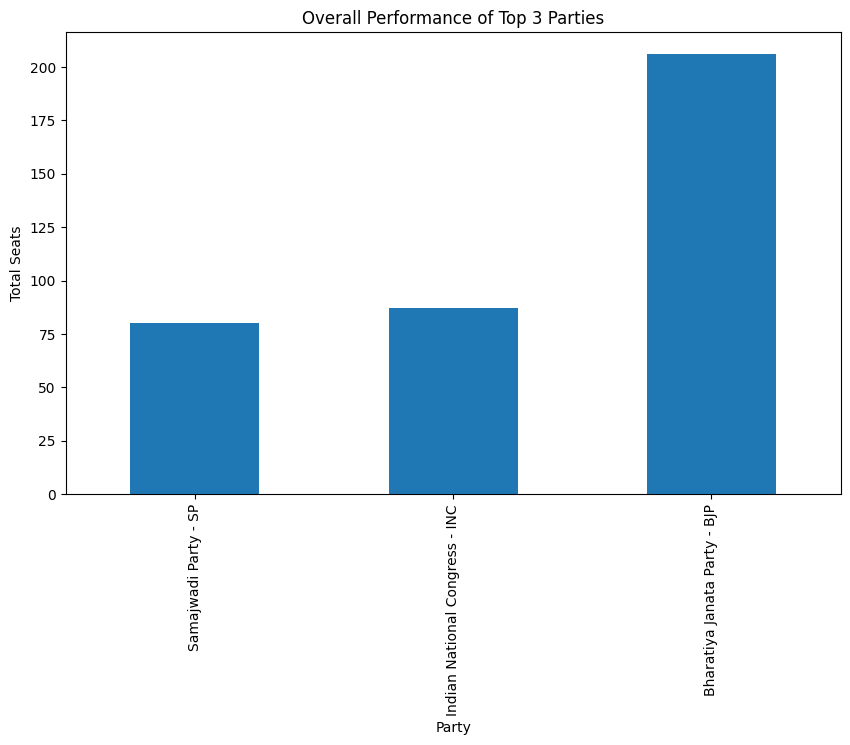

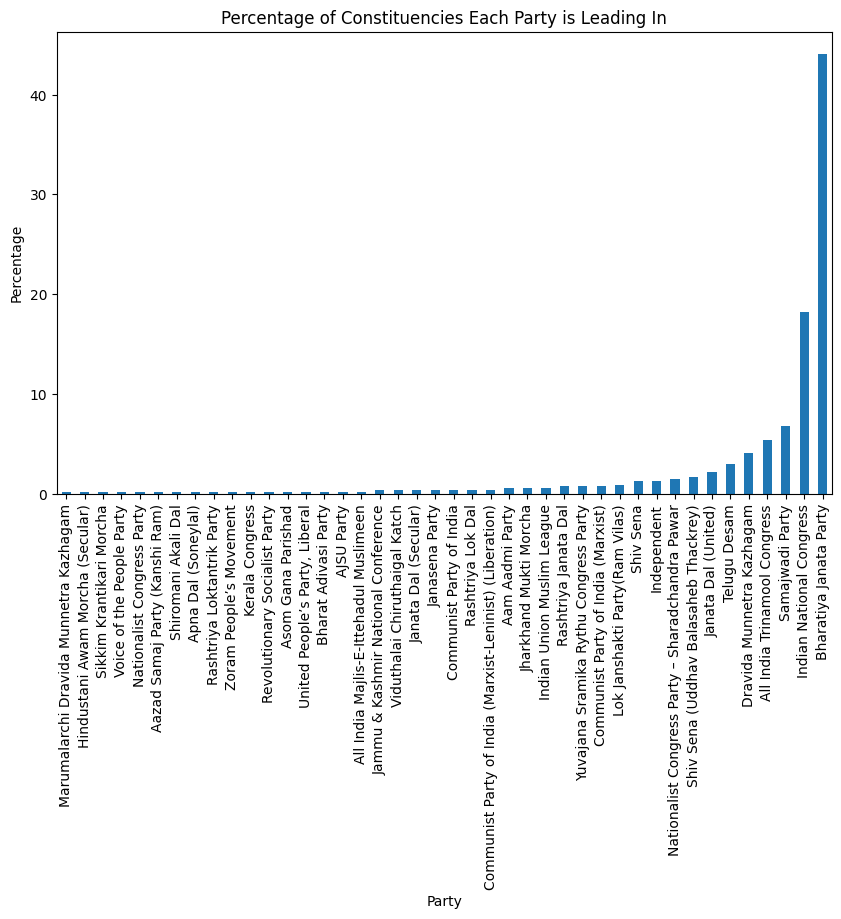

In [12]:
# Leading party constituencies
plt.figure(figsize=(10, 6))
sns.barplot(x=leading_party_counts.index, y=leading_party_counts.values)
plt.title('Number of Constituencies Each Party is Leading In')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=90)
plt.show()

# Trailing party constituencies
plt.figure(figsize=(10, 6))
sns.barplot(x=trailing_party_counts.index, y=trailing_party_counts.values)
plt.title('Number of Constituencies Each Party is Trailing In')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=90)
plt.show()

# Total seats won by each party
plt.figure(figsize=(10, 6))
total_seats_won.sort_values().plot(kind='bar')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Total Seats')
plt.xticks(rotation=90)
plt.show()

# Top 5 highest margin constituencies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_highest_margin['Constituency'], y=top_5_highest_margin[margin_col])
plt.title('Top 5 Constituencies with Highest Margin')
plt.xlabel('Constituency')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.show()

# Top 5 lowest margin constituencies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_lowest_margin['Constituency'], y=top_5_lowest_margin[margin_col])
plt.title('Top 5 Constituencies with Lowest Margin')
plt.xlabel('Constituency')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.show()

# States with highest number of seats won by a single party
plt.figure(figsize=(10, 6))
sns.barplot(x=states_highest_seats['State'], y=states_highest_seats[total_seats_col], hue=states_highest_seats[winning_party_col])
plt.title('States with Highest Number of Seats Won by a Single Party')
plt.xlabel('State')
plt.ylabel('Total Seats')
plt.xticks(rotation=90)
plt.legend(title='Winning Party')
plt.show()

# Party performance by state
plt.figure(figsize=(15, 10))
party_performance_by_state.plot(kind='bar', stacked=True)
plt.title('Party Performance by State')
plt.xlabel('State')
plt.ylabel('Total Seats')
plt.xticks(rotation=90)
plt.legend(title='Party')
plt.show()

# Top 3 parties performance
plt.figure(figsize=(10, 6))
top_3_parties_performance.sort_values().plot(kind='bar')
plt.title('Overall Performance of Top 3 Parties')
plt.xlabel('Party')
plt.ylabel('Total Seats')
plt.xticks(rotation=90)
plt.show()

# Percentage of constituencies each party is leading in
plt.figure(figsize=(10, 6))
leading_party_percentage.sort_values().plot(kind='bar')
plt.title('Percentage of Constituencies Each Party is Leading In')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


In [13]:
# 3D Scatter Plot for leading parties
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=leading_party_counts.index,
    y=leading_party_counts.values,
    z=[0]*len(leading_party_counts),
    mode='markers',
    marker=dict(size=5, color='blue')
))
for party in leading_party_counts.index:
    fig.add_trace(go.Scatter3d(
        x=[party, party],
        y=[leading_party_counts[party], leading_party_counts[party]],
        z=[0, leading_party_counts[party]],
        mode='lines',
        line=dict(color='blue', width=10)
    ))
fig.update_layout(
    title='Number of Constituencies Each Party is Leading In (3D)',
    scene=dict(
        xaxis_title='Party',
        yaxis_title='Number of Constituencies',
        zaxis_title=''
    )
)
fig.show()

# 3D Scatter Plot for trailing parties
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=trailing_party_counts.index,
    y=trailing_party_counts.values,
    z=[0]*len(trailing_party_counts),
    mode='markers',
    marker=dict(size=5, color='red')
))
for party in trailing_party_counts.index:
    fig.add_trace(go.Scatter3d(
        x=[party, party],
        y=[trailing_party_counts[party], trailing_party_counts[party]],
        z=[0, trailing_party_counts[party]],
        mode='lines',
        line=dict(color='red', width=10)
    ))
fig.update_layout(
    title='Number of Constituencies Each Party is Trailing In (3D)',
    scene=dict(
        xaxis_title='Party',
        yaxis_title='Number of Constituencies',
        zaxis_title=''
    )
)
fig.show()


In [14]:

app = dash.Dash(__name__)

# Create figures
fig1 = px.bar(leading_party_counts, title='Number of Constituencies Each Party is Leading In')
fig2 = px.bar(trailing_party_counts, title='Number of Constituencies Each Party is Trailing In')
fig3 = px.bar(total_seats_won, title='Total Seats Won by Each Party')
fig4 = px.bar(margin_status_distribution, title='Margin Status Distribution')
fig5 = px.bar(top_5_highest_margin, x='Constituency', y='Margin', title='Top 5 Constituencies with Highest Margin')
fig6 = px.bar(top_5_lowest_margin, x='Constituency', y='Margin', title='Top 5 Constituencies with Lowest Margin')
fig7 = px.bar(states_highest_seats, x='State', y='Total Seats', color='Winning Party', title='States with Highest Number of Seats Won by a Single Party')
fig8 = px.bar(party_performance_by_state, title='Party Performance by State', barmode='stack')
fig9 = px.bar(top_3_parties_performance, title='Overall Performance of Top 3 Parties')
fig10 = px.bar(leading_party_percentage, title='Percentage of Constituencies Each Party is Leading In')

# Layout
app.layout = html.Div(children=[
    html.H1(children='Election Results Analysis'),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4),
    dcc.Graph(figure=fig5),
    dcc.Graph(figure=fig6),
    dcc.Graph(figure=fig7),
    dcc.Graph(figure=fig8),
    dcc.Graph(figure=fig9),
    dcc.Graph(figure=fig10)
])

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


<IPython.core.display.Javascript object>